In [64]:
from copy import deepcopy
from io import StringIO
import json

import requests
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

## Set up

In [2]:
CARGILL_COLORS = {
    'PMS 704 C'         : '#A72B2D',
    'PMS 167 C'         : '#C2531B',
    'PMS 145 C'         : '#D57F00',
    'PMS 110 C'         : '#DBAA00',
    'PMS 7745 C'        : '#ABAD25',
    'PMS 370 C'         : '#638C1C',
    'PMS 7473 C'        : '#19988B',
    'PMS 7474 C'        : '#007582',
    'PMS 7469 C'        : '#005E86',
    'Cool Gray 2 C'     : '#D1D0CF',
    'Cool Gray 7 C'     : '#98999B',
    'Cool Gray 10 C'    : '#63656A',
}

In [3]:
CARGILL_COLORS_25PC_TINT = {
    'PMS 704 C'         : '#BD6062',
    'PMS 167 C'         : '#D17E54',
    'PMS 145 C'         : '#E09F40',
    'PMS 110 C'         : '#E4BF40',
    'PMS 7745 C'        : '#C0C25C',
    'PMS 370 C'         : '#8AA955',
    'PMS 7473 C'        : '#53B2A8',
    'PMS 7474 C'        : '#4098A1',
    'PMS 7469 C'        : '#4086A4',
}

In [4]:
CARGILL_COLORS_75PC_TINT = {
    'PMS 704 C'         : '#E9CACB',
    'PMS 167 C'         : '#F0D4C6',
    'PMS 145 C'         : '#F5DFBF',
    'PMS 110 C'         : '#F6EABF',
    'PMS 7745 C'        : '#EAEBC9',
    'PMS 370 C'         : '#D8E2C6',
    'PMS 7473 C'        : '#C6E5E2',
    'PMS 7474 C'        : '#BFDDE0',
    'PMS 7469 C'        : '#BFD7E1',
}

In [5]:
CARGILL_COLORS_50PC_TINT = {
    'PMS 704 C'         : '#D39596',
    'PMS 167 C'         : '#E1A98D',
    'PMS 145 C'         : '#EABF80',
    'PMS 110 C'         : '#EDD580',
    'PMS 7745 C'        : '#D5D692',
    'PMS 370 C'         : '#B1C68E',
    'PMS 7473 C'        : '#8CCCC5',
    'PMS 7474 C'        : '#80BAC1',
    'PMS 7469 C'        : '#80AFC3',
}

In [6]:
NUMBER_REGIONS_IN_BRAZIL = 5

## Brazil

In [68]:
REGIONS_API_URL = 'https://servicodados.ibge.gov.br/api/v1/localidades/regioes'
GEOMETRY_API_BASE_URL = (
    'https://servicodados.ibge.gov.br/api/v3/malhas/regioes/{id}?' + 
    '&'.join([
        'intrarregiao=UF',
        'qualidade=minima',
        'formato=application/vnd.geo+json',
    ])
)
GEOMETRY_API_BASE_URL

'https://servicodados.ibge.gov.br/api/v3/malhas/regioes/{id}?intrarregiao=UF&qualidade=minima&formato=application/vnd.geo+json'

In [69]:
brazil_regions_request = requests.get(REGIONS_API_URL)
brazil_regions_request.status_code

200

In [70]:
brazil_regions = brazil_regions_request.json()
brazil_regions

[{'id': 1, 'sigla': 'N', 'nome': 'Norte'},
 {'id': 2, 'sigla': 'NE', 'nome': 'Nordeste'},
 {'id': 3, 'sigla': 'SE', 'nome': 'Sudeste'},
 {'id': 4, 'sigla': 'S', 'nome': 'Sul'},
 {'id': 5, 'sigla': 'CO', 'nome': 'Centro-Oeste'}]

### Example region

In [71]:
example_region = brazil_regions[1]
example_region

{'id': 2, 'sigla': 'NE', 'nome': 'Nordeste'}

In [72]:
example_region_geometry_request = requests.get(GEOMETRY_API_BASE_URL.format(id=example_region['id']))
example_region_geometry_request.status_code

200

In [73]:
example_region_geometry = example_region_geometry_request.json()
example_region_geometry

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-48.0254, -4.7783],
       [-48.0584, -4.8042],
       [-48.1946, -4.911],
       [-48.2124, -4.9249],
       [-48.4519, -5.1122],
       [-48.7552, -5.3492],
       [-48.6061, -5.3365],
       [-48.4872, -5.1939],
       [-48.3639, -5.1684],
       [-48.225, -5.2355],
       [-48.1849, -5.257],
       [-48.0691, -5.2715],
       [-48.0147, -5.238],
       [-47.9373, -5.2396],
       [-47.8667, -5.3053],
       [-47.8275, -5.3866],
       [-47.6804, -5.4154],
       [-47.5603, -5.4632],
       [-47.4797, -5.6217],
       [-47.4769, -5.6373],
       [-47.4423, -5.8308],
       [-47.4379, -5.8571],
       [-47.4394, -6.0118],
       [-47.4302, -6.0684],
       [-47.3807, -6.25],
       [-47.4303, -6.4226],
       [-47.4252, -6.4974],
       [-47.4651, -6.5815],
       [-47.4962, -6.6972],
       [-47.5205, -6.8405],
       [-47.5471, -7.0167],
       [-47.6604, -

In [74]:
%env GDAL_ENABLE_DEPRECATED_DRIVER_GTM=YES
%env

env: GDAL_ENABLE_DEPRECATED_DRIVER_GTM=YES


{'ELECTRON_RUN_AS_NODE': '1',
 'SHELL': '/usr/bin/zsh',
 'I3SOCK': '/run/user/1000/i3/ipc-socket.806',
 'SSH_AUTH_SOCK': '/run/user/1000/keyring/ssh',
 'XDG_CONFIG_HOME': '/home/tomaz/.config',
 'SSH_AGENT_PID': '767',
 'XDG_SEAT': 'seat0',
 'PWD': '/home/tomaz',
 'LOGNAME': 'tomaz',
 'QSYS_ROOTDIR': '/usr/local/src/quartus-free/pkg/quartus-free-quartus/opt/intelFPGA/21.1/quartus/sopc_builder/bin',
 'XDG_SESSION_TYPE': 'tty',
 'SYSTEMD_EXEC_PID': '519',
 'XAUTHORITY': '/home/tomaz/.Xauthority',
 'WINDOWPATH': '1',
 'MOTD_SHOWN': 'pam',
 'HOME': '/home/tomaz',
 'LANG': 'en_GB.UTF-8',
 'INVOCATION_ID': '8bbb08b484834e0d989d17021445ef24',
 'XDG_SESSION_CLASS': 'user',
 'TERM': 'xterm-color',
 'USER': 'tomaz',
 'DISPLAY': ':0',
 'SHLVL': '2',
 'XDG_VTNR': '1',
 'XDG_SESSION_ID': '1',
 'XDG_RUNTIME_DIR': '/run/user/1000',
 'PATH': '/home/tomaz/Documents/CGPS GLS/venv/bin:/home/tomaz/Documents/CGPS GLS/venv/bin:/usr/local/sbin:/usr/local/bin:/usr/bin:/usr/lib/jvm/default/bin:/usr/bin/site_pe

In [85]:
def gpd_read_url_json(url: str) -> gpd.GeoDataFrame:
    with requests.get(url) as response:
        # A buffer is required as `gpd.read_file` cannot read Python objects directly
        # so we load the response JSON and dump it back into the buffer.
        with StringIO(json.dumps(response.json())) as buffer:
            return gpd.read_file(buffer)

In [86]:
example_geometry_geoseries = gpd_read_url_json(example_region_geometry_request.url)
example_geometry_geoseries

,codarea,geometry
0,21,"MULTIPOLYGON (((-48.02540 -4.77830, -48.05840 ..."
1,22,"POLYGON ((-40.76430 -8.24400, -40.60390 -8.103..."
2,23,"POLYGON ((-40.37190 -2.81240, -40.45500 -2.803..."
3,24,"POLYGON ((-36.50440 -6.38650, -36.34400 -6.302..."
4,25,"POLYGON ((-37.57180 -7.48910, -37.52170 -7.439..."
5,26,"POLYGON ((-40.95900 -8.84200, -40.85100 -8.954..."
6,27,"POLYGON ((-38.01210 -9.15600, -38.09230 -9.172..."
7,28,"POLYGON ((-36.91800 -10.12470, -36.94740 -10.0..."
8,29,"POLYGON ((-39.35680 -8.54750, -39.47610 -8.592..."


<AxesSubplot:>

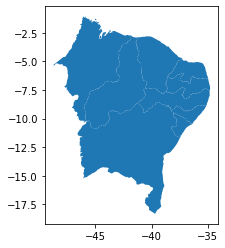

In [77]:
example_geometry_geoseries.plot()

### All regions

In [38]:
brazil_regions_df = pd.DataFrame(brazil_regions)
brazil_regions_df

,id,sigla,nome
0,1,N,Norte
1,2,NE,Nordeste
2,3,SE,Sudeste
3,4,S,Sul
4,5,CO,Centro-Oeste


In [87]:
brazil_regions_geometries = {
    row.id: gpd_read_url_json(GEOMETRY_API_BASE_URL.format(id=row.id)).geometry
    for _, row in brazil_regions_df.iterrows()
}

brazil_regions_geometries

{1: 0    POLYGON ((-62.41770 -13.11890, -62.27850 -13.1...
 1    POLYGON ((-66.81030 -9.81800, -67.13500 -9.675...
 2    POLYGON ((-58.14740 -7.34320, -58.18100 -7.181...
 3    POLYGON ((-64.18440 3.48930, -64.11790 3.33740...
 4    POLYGON ((-48.19460 -4.91100, -48.05840 -4.804...
 5    MULTIPOLYGON (((-50.45010 2.10920, -50.52120 2...
 6    POLYGON ((-47.43030 -6.42260, -47.38070 -6.250...
 Name: geometry, dtype: geometry,
 2: 0    MULTIPOLYGON (((-48.02540 -4.77830, -48.05840 ...
 1    POLYGON ((-40.76430 -8.24400, -40.60390 -8.103...
 2    POLYGON ((-40.37190 -2.81240, -40.45500 -2.803...
 3    POLYGON ((-36.50440 -6.38650, -36.34400 -6.302...
 4    POLYGON ((-37.57180 -7.48910, -37.52170 -7.439...
 5    POLYGON ((-40.95900 -8.84200, -40.85100 -8.954...
 6    POLYGON ((-38.01210 -9.15600, -38.09230 -9.172...
 7    POLYGON ((-36.91800 -10.12470, -36.94740 -10.0...
 8    POLYGON ((-39.35680 -8.54750, -39.47610 -8.592...
 Name: geometry, dtype: geometry,
 3: 0    POLYGON ((-47.67970 -

In [88]:
bounds_df_list = []
for geometry in brazil_regions_geometries.values():
    bounds_df_list.append(geometry.bounds)
bounds_df = pd.concat(bounds_df_list)
bounds_df

,minx,miny,maxx,maxy
0,-66.8103,-13.6930,-59.7794,-7.9759
1,-73.9833,-11.1456,-66.6269,-7.1118
2,-73.8016,-9.8180,-56.0987,2.2440
3,-64.8105,-1.5790,-58.8955,5.2718
4,-58.8955,-9.8412,-46.0634,2.5837
5,-54.8723,-1.2150,-49.8817,4.5088
6,-50.7389,-13.4682,-45.6993,-5.1684
0,-48.7552,-10.2585,-41.7967,-1.0528
1,-46.0124,-10.9190,-40.3705,-2.7573
2,-41.4144,-7.8576,-37.2527,-2.8034


In [89]:
brazil_bounds_series = bounds_df.apply({
    'minx': 'min',
    'miny': 'min',
    'maxx': 'max',
    'maxy': 'max',
})
brazil_bounds_series

minx   -73.9833
miny   -33.7439
maxx   -34.8027
maxy     5.2718
dtype: float64

In [90]:
REGIONS_COLOR_MAP = {
    1: 'PMS 370 C',
    2: 'PMS 7745 C',
    3: 'PMS 145 C',
    4: 'PMS 167 C',
    5: 'PMS 110 C',
}
REGIONS_HEX_COLOR_MAP = {key: CARGILL_COLORS[value] for key, value in REGIONS_COLOR_MAP.items()}
REGIONS_HEX_COLOR_MAP

{1: '#638C1C', 2: '#ABAD25', 3: '#D57F00', 4: '#C2531B', 5: '#DBAA00'}

In [91]:
def color_brazil_regions(
        regions_df: pd.DataFrame,
        color_map: dict[int, str],
        region_geometries: dict[int, gpd.GeoSeries] = None,
        ax: plt.Axes = None,
        **fig_kwargs) -> plt.Axes:

    if 'cmap' in fig_kwargs.keys():
        raise ValueError('Custom color map must be specified using the color_map positional argument')

    for _, row in regions_df.iterrows():
        geometry_url = GEOMETRY_API_BASE_URL.format(id=row.id)
        geometry_geoseries: gpd.GeoSeries
        if region_geometries is not None and row.id in region_geometries:
            geometry_geoseries = region_geometries[row.id]
        else:
            geometry_geoseries = gpd_read_url_json(geometry_url)

        ax = geometry_geoseries.plot(
            color=color_map[row.id],
            ax=ax,
            **fig_kwargs)

    return ax

<AxesSubplot:>

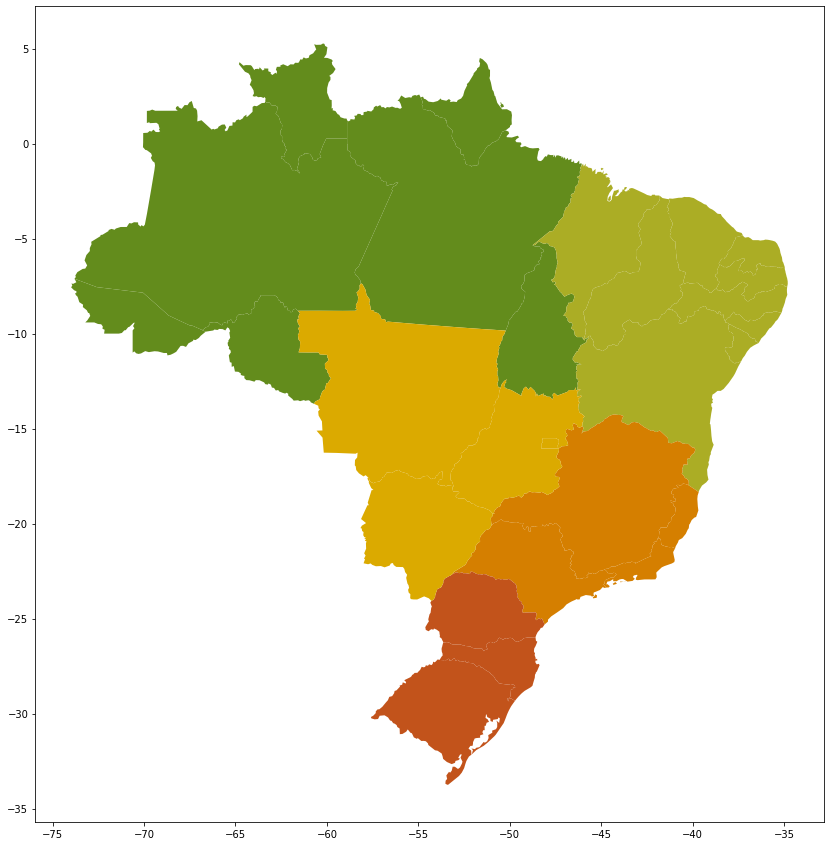

In [93]:
color_brazil_regions(brazil_regions_df, REGIONS_HEX_COLOR_MAP, figsize=(15, 15))

### Trying out multiple colorschemes

In [ ]:
regions_color_maps: list[list[dict[int, str]]] = []

CARGILL_COLORS_LIST = list(CARGILL_COLORS.values())
for i in range(len(CARGILL_COLORS_LIST) - NUMBER_REGIONS_IN_BRAZIL + 1):
    selected_colors = CARGILL_COLORS_LIST[i:i+NUMBER_REGIONS_IN_BRAZIL]
    color_maps = []
    for j in range(NUMBER_REGIONS_IN_BRAZIL):
        color_map = {}
        for k in range(NUMBER_REGIONS_IN_BRAZIL):
            index = (j+k) % NUMBER_REGIONS_IN_BRAZIL
            # Region IDs start in 1, so we add one to the index starting in 0
            color_map[k+1] = selected_colors[index]
        color_maps.append(color_map)
    regions_color_maps.append(color_maps)

: 

In [ ]:
nrows = len(regions_color_maps)
nrows

8

: 

In [ ]:
assert all([len(region_color_maps) == len(regions_color_maps[0]) for region_color_maps in regions_color_maps])
ncols = len(regions_color_maps[0])
ncols

5

: 

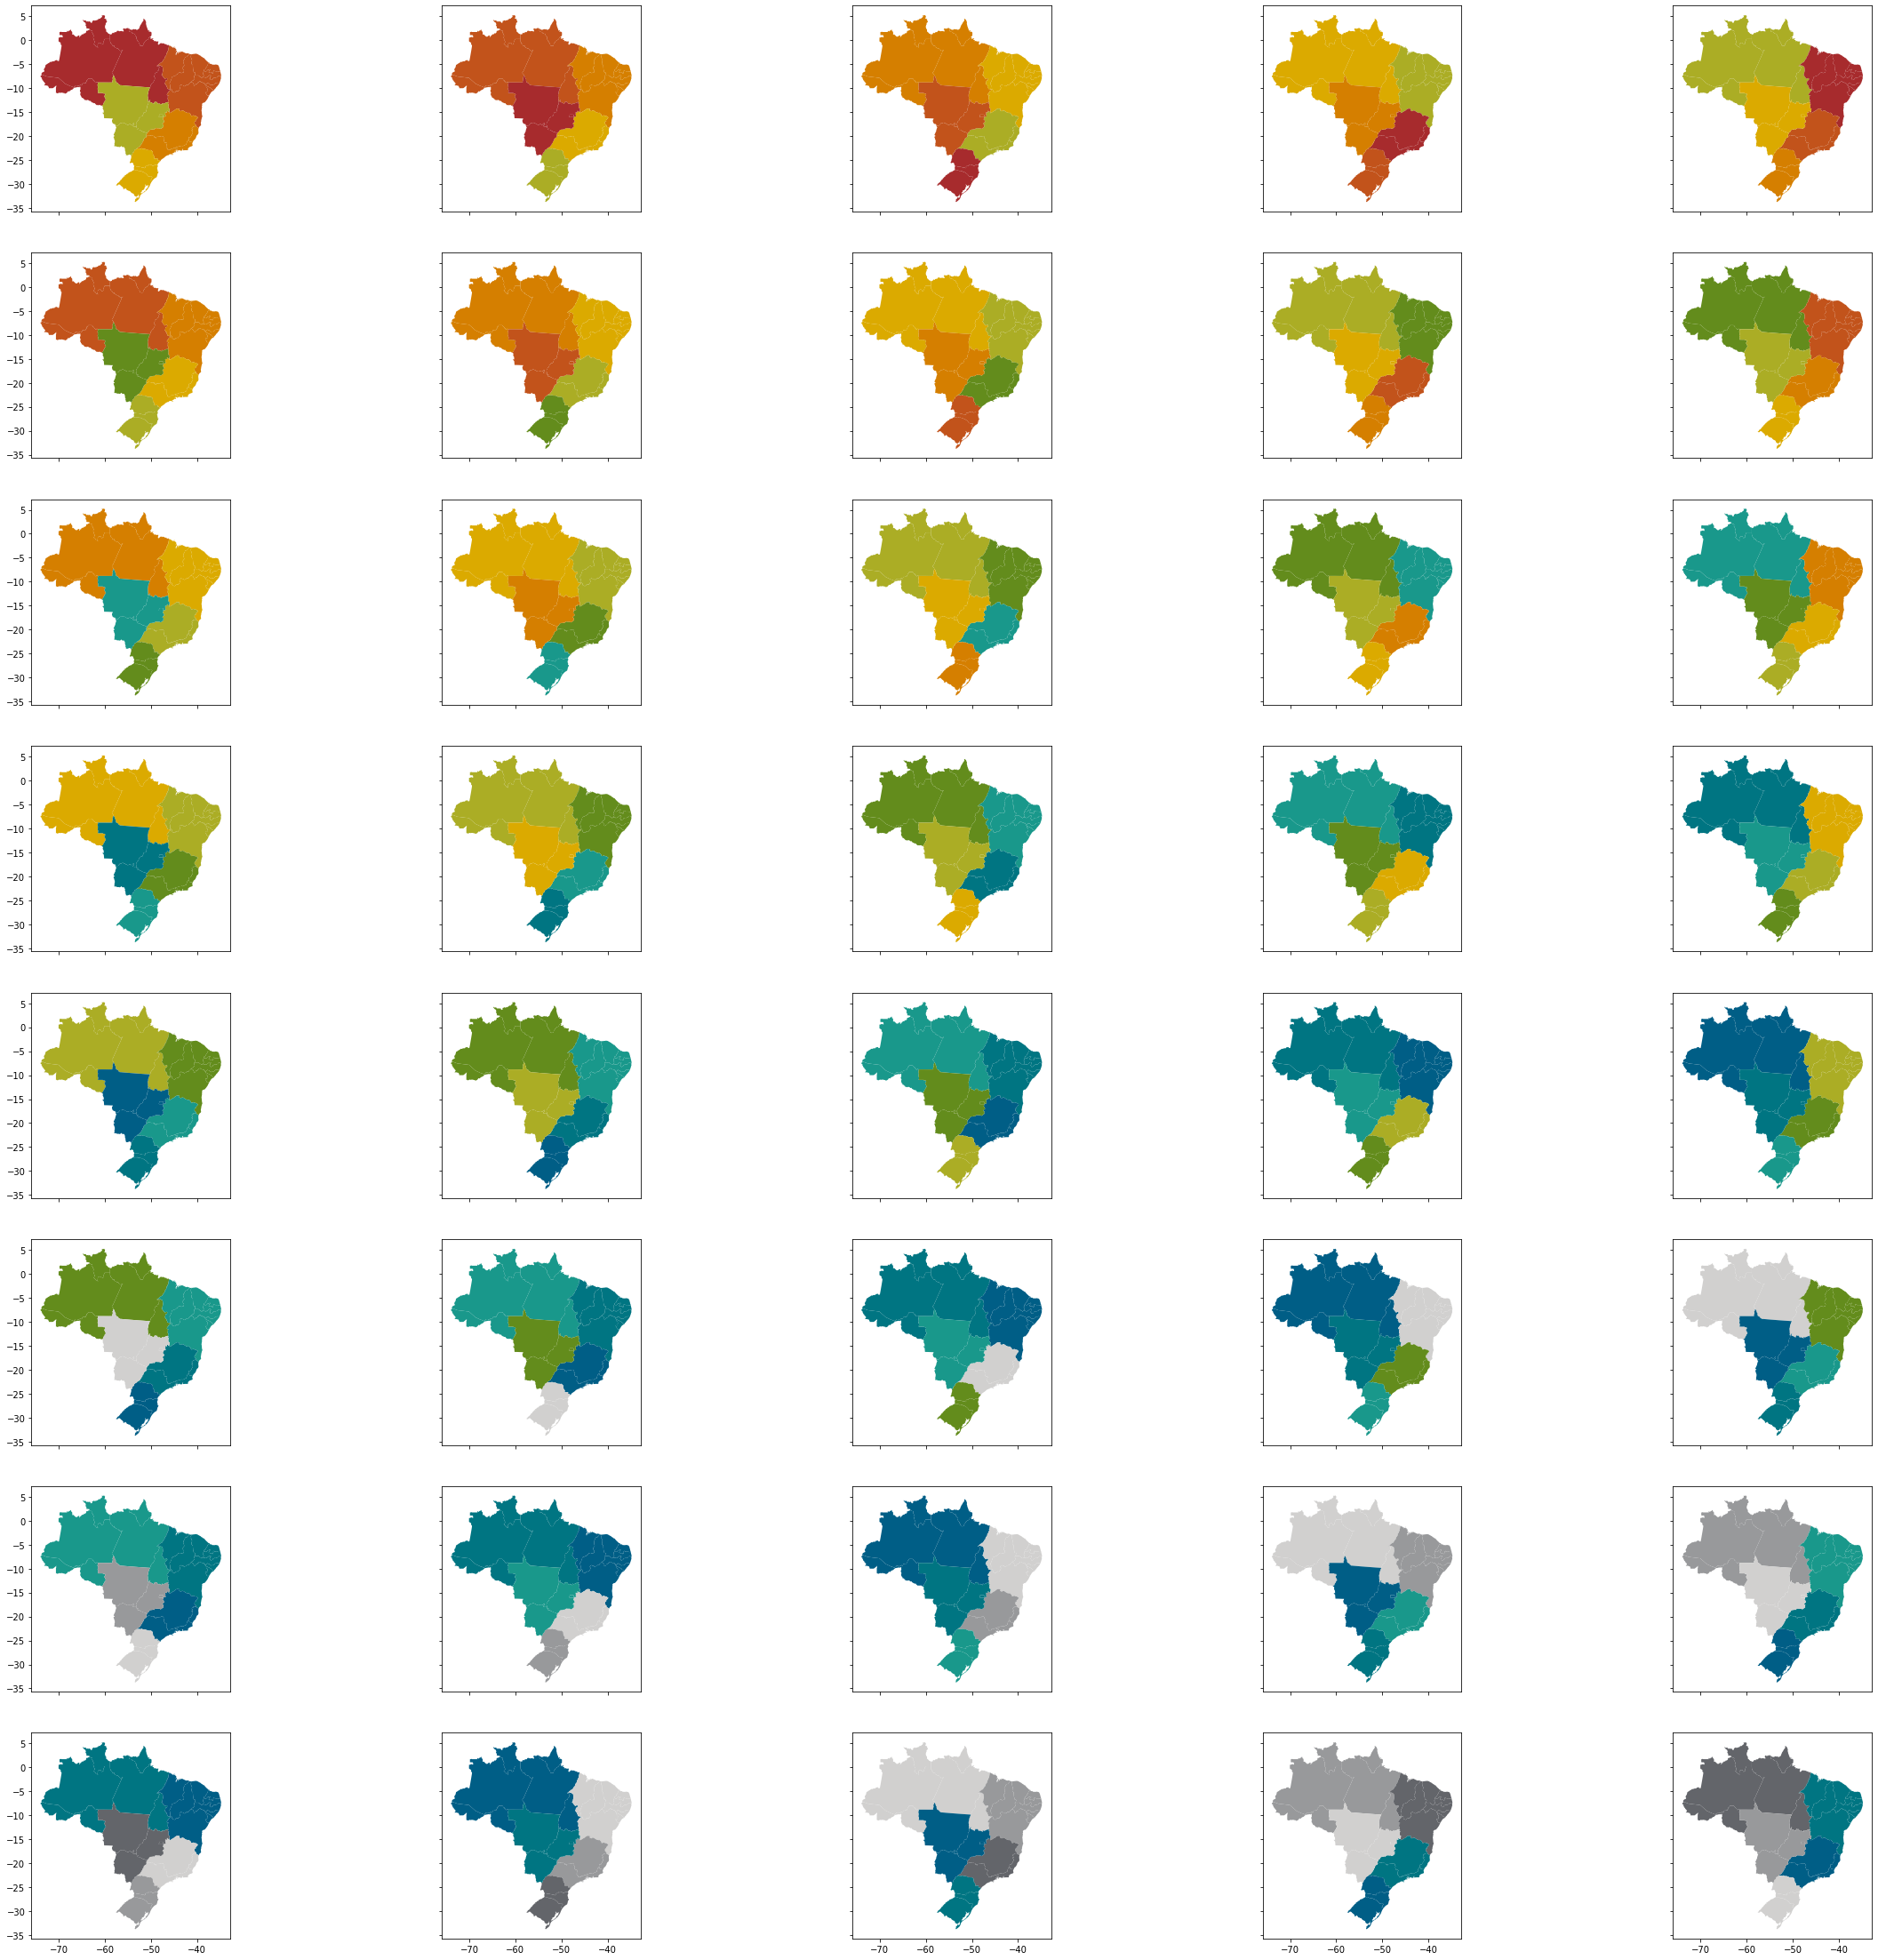

: 

In [ ]:
fig, ax = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    sharex=True,
    sharey=True,
    figsize=(40, 40))
for i, region_color_maps in enumerate(regions_color_maps):
    for j, color_map in enumerate(region_color_maps):
        color_brazil_regions(
            brazil_regions_df,
            color_map,
            region_geometries=brazil_regions_geometries,
            ax=ax[i][j],
            figsize=(5, 5))

## South America
The map of other countries in South America will be used as background so the video frame is not so empty.

In [94]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [95]:
world: gpd.GeoDataFrame = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,KOS,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [96]:
world.continent.unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [100]:
'France' in world.name[world.continent == 'Europe'].values

True

In [103]:
south_america: gpd.GeoDataFrame = world[
    (world.continent == 'South America')
    | (world.name == 'France') # French Guiana is a part of France 
]
south_america

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
20,3398.0,South America,Falkland Is.,FLK,282,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
28,3461734.0,South America,Uruguay,URY,56045,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1..."
29,211049527.0,South America,Brazil,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."
30,11513100.0,South America,Bolivia,BOL,40895,"POLYGON ((-69.52968 -10.95173, -68.78616 -11.0..."
31,32510453.0,South America,Peru,PER,226848,"POLYGON ((-69.89364 -4.29819, -70.79477 -4.251..."
32,50339443.0,South America,Colombia,COL,323615,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."
40,28515829.0,South America,Venezuela,VEN,482359,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810..."
41,782766.0,South America,Guyana,GUY,5173,"POLYGON ((-56.53939 1.89952, -56.78270 1.86371..."


In [104]:
south_america_no_brazil = south_america[south_america.name != 'Brazil']
south_america_no_brazil

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
20,3398.0,South America,Falkland Is.,FLK,282,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
28,3461734.0,South America,Uruguay,URY,56045,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1..."
30,11513100.0,South America,Bolivia,BOL,40895,"POLYGON ((-69.52968 -10.95173, -68.78616 -11.0..."
31,32510453.0,South America,Peru,PER,226848,"POLYGON ((-69.89364 -4.29819, -70.79477 -4.251..."
32,50339443.0,South America,Colombia,COL,323615,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."
40,28515829.0,South America,Venezuela,VEN,482359,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810..."
41,782766.0,South America,Guyana,GUY,5173,"POLYGON ((-56.53939 1.89952, -56.78270 1.86371..."
42,581363.0,South America,Suriname,SUR,3697,"POLYGON ((-54.52475 2.31185, -55.09759 2.52375..."


In [105]:
world_no_brazil = world[world.name != 'Brazil']
world_no_brazil

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,KOS,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

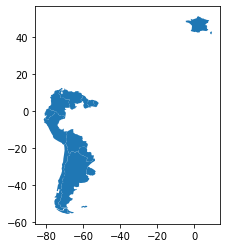

In [106]:

background_geometry: gpd.GeoSeries = south_america_no_brazil.geometry
background_geometry.plot()

<AxesSubplot:>

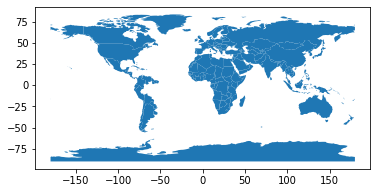

In [107]:
world_background_geometry: gpd.GeoSeries = world_no_brazil.geometry
world_background_geometry.plot()

## Putting it all together

<AxesSubplot:>

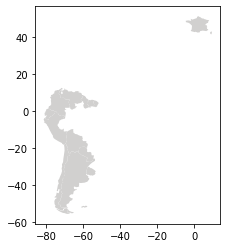

In [108]:
ax = background_geometry.plot(color=CARGILL_COLORS['Cool Gray 2 C'])
ax

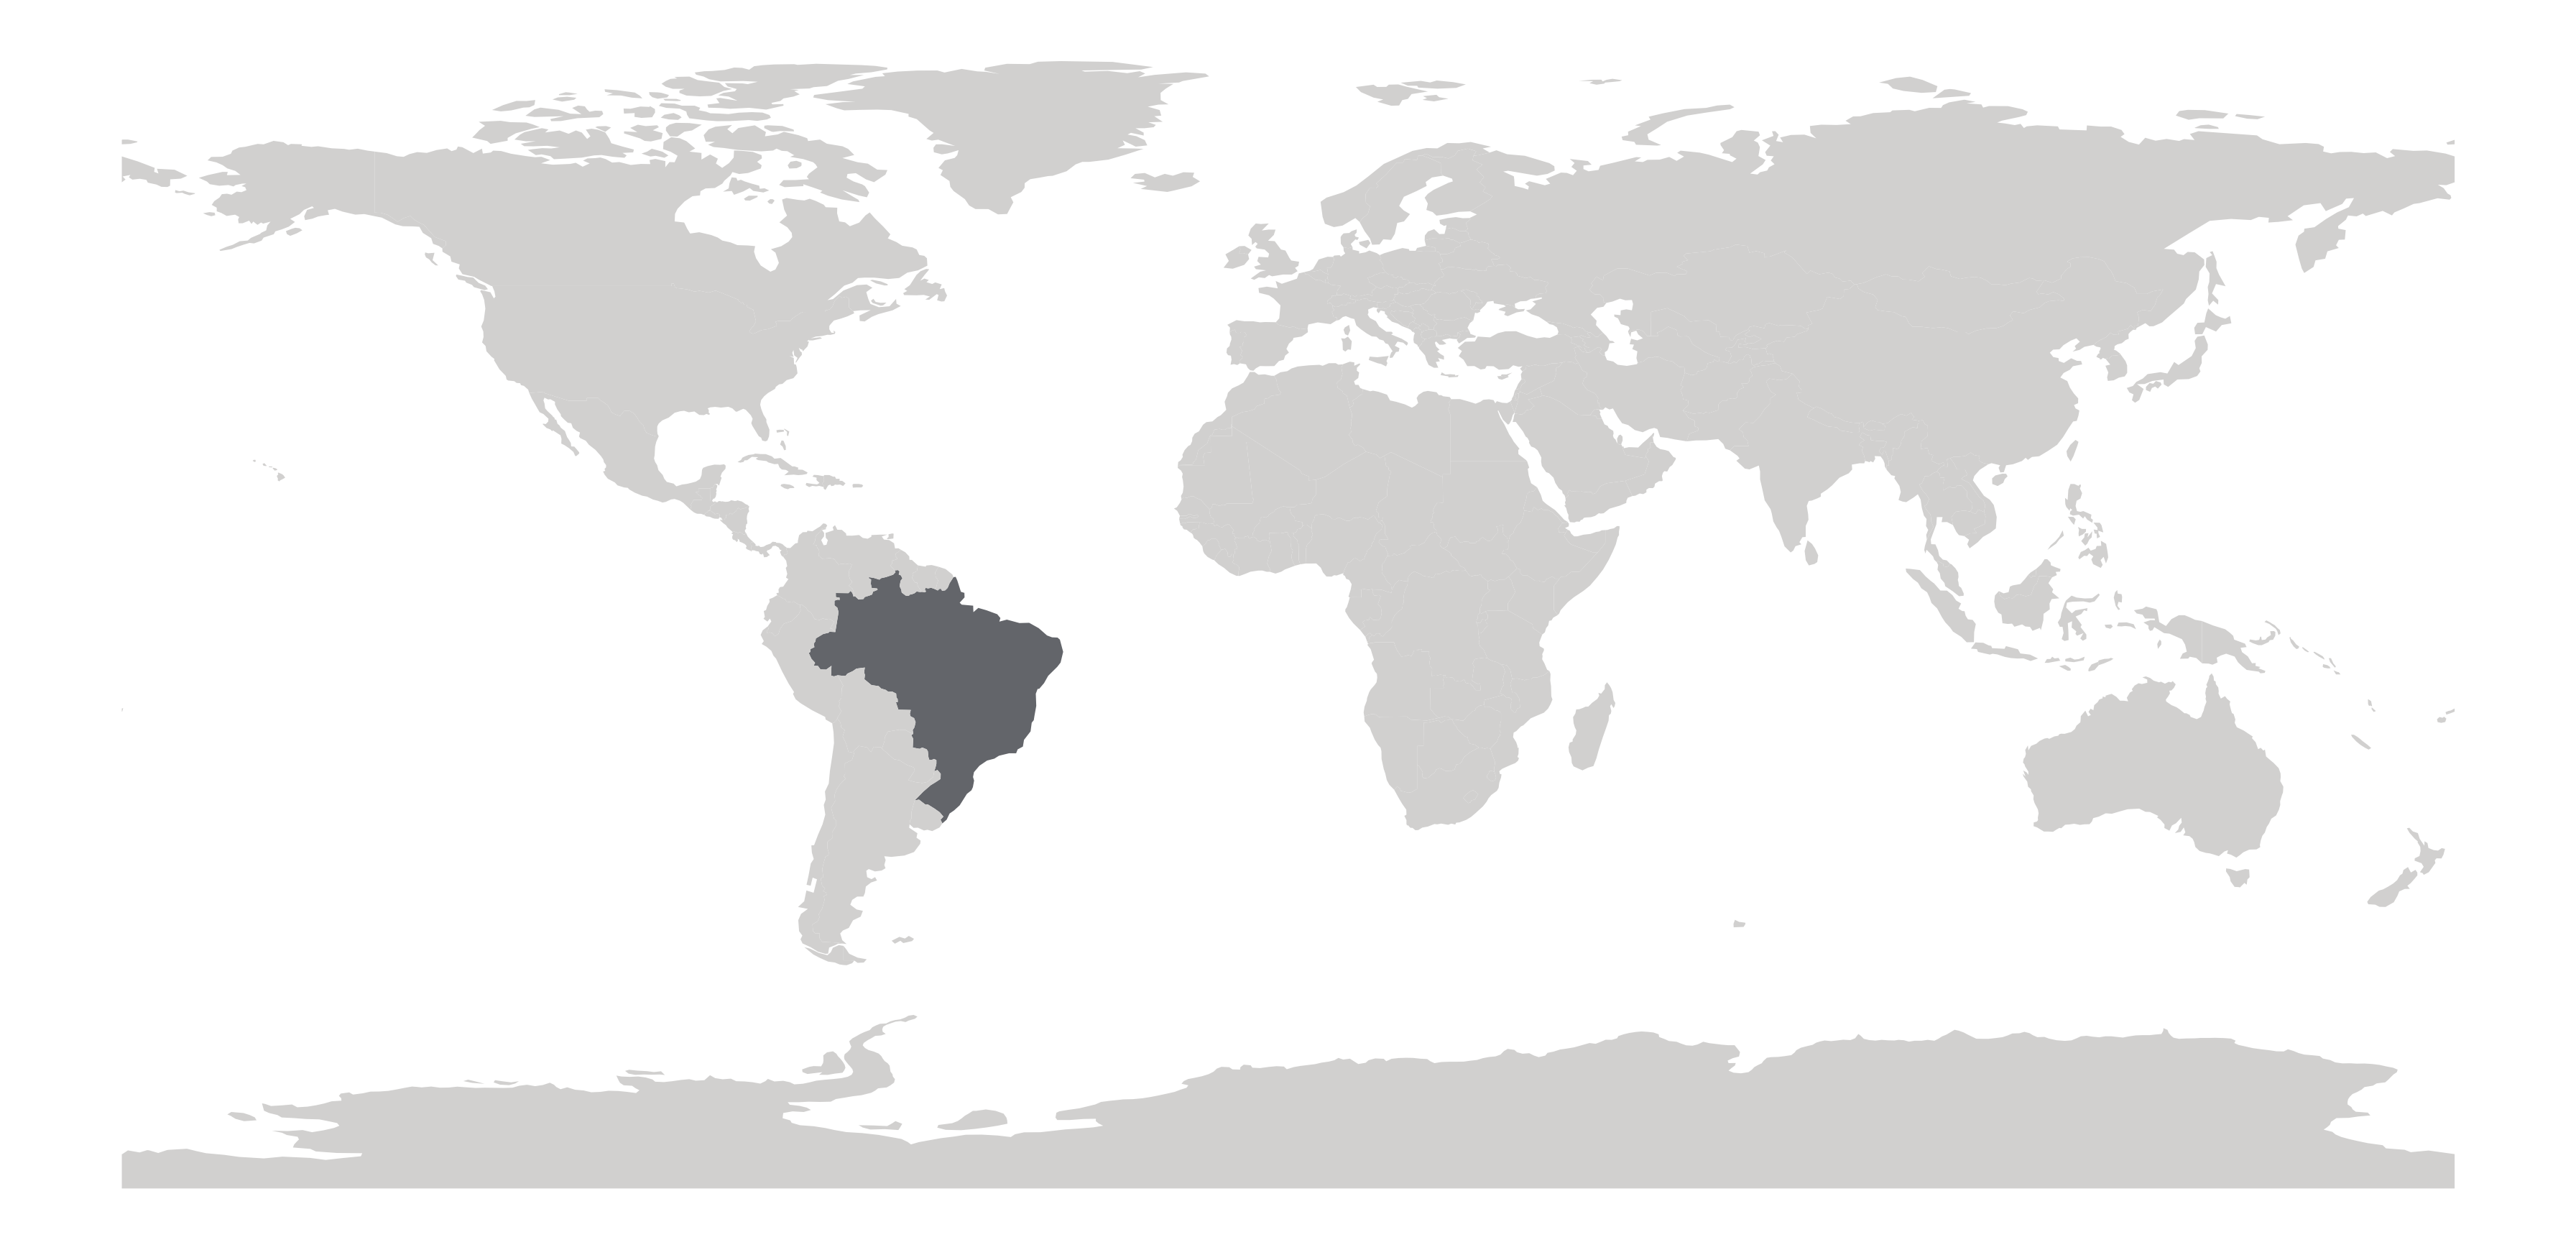

In [109]:
COORDINATE_BUFFER_AROUND_BRAZIL = 2
SCALE = 4
ASPECT_RATIO = 16/9

xlim = (
    brazil_bounds_series.minx - COORDINATE_BUFFER_AROUND_BRAZIL,
    brazil_bounds_series.maxx + COORDINATE_BUFFER_AROUND_BRAZIL,
)
ylim = (
    brazil_bounds_series.miny - COORDINATE_BUFFER_AROUND_BRAZIL,
    brazil_bounds_series.maxy + COORDINATE_BUFFER_AROUND_BRAZIL,
)
height = abs(ylim[0] - ylim[1])
width = height * ASPECT_RATIO
center_x = (brazil_bounds_series.minx + brazil_bounds_series.maxx) / 2
xlim = (
    center_x - width/2,
    center_x + width/2,
)

# ax = color_brazil_regions(
#     brazil_regions_df,
#     {i: CARGILL_COLORS['Cool Gray 10 C'] for i in range(1,6)},
#     region_geometries=brazil_regions_geometries,
#     figsize=(16*SCALE, 9*SCALE))
fig, ax = plt.subplots()
fig.set_figheight(9*SCALE)
fig.set_figwidth(16*SCALE)

world[world.name == 'Brazil'].geometry.plot(color=CARGILL_COLORS['Cool Gray 10 C'], figsize=(16*SCALE, 9*SCALE), ax=ax)
world_background_geometry.plot(color=CARGILL_COLORS['Cool Gray 2 C'], ax=ax)
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
ax.set_axis_off()

fig.savefig(
    f'results/world.png',
    bbox_inches='tight',
    pad_inches=0.0)

In [110]:
def plot(
        regions_df: pd.DataFrame,
        region_geometries: dict[int, gpd.GeoSeries],
        bounds: pd.Series,
        background_geometry: gpd.GeoSeries,
        buffer_around_brazil: int = 2,
        color_map: dict[int, str] = REGIONS_HEX_COLOR_MAP,
        background_color: str = CARGILL_COLORS['Cool Gray 2 C'],
        aspect: tuple[int, int] = (16, 9),
        scale: int = 1,
        **plot_kwargs) -> plt.Axes:

    xlim = (
        bounds.minx - buffer_around_brazil,
        bounds.maxx + buffer_around_brazil,
    )
    ylim = (
        bounds.miny - buffer_around_brazil,
        bounds.maxy + buffer_around_brazil,
    )
    height = abs(ylim[0] - ylim[1])
    aspect_ratio = aspect[0] / aspect[1]
    width = height * aspect_ratio
    center_x = (bounds.minx + bounds.maxx) / 2
    xlim = (
        center_x - width/2,
        center_x + width/2,
    )

    ax = color_brazil_regions(
        regions_df,
        color_map,
        region_geometries=region_geometries,
        figsize=(scale*aspect[0], scale*aspect[1]),
        **plot_kwargs)
    background_geometry.plot(color=background_color, ax=ax)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_axis_off()

    return ax

<AxesSubplot:>

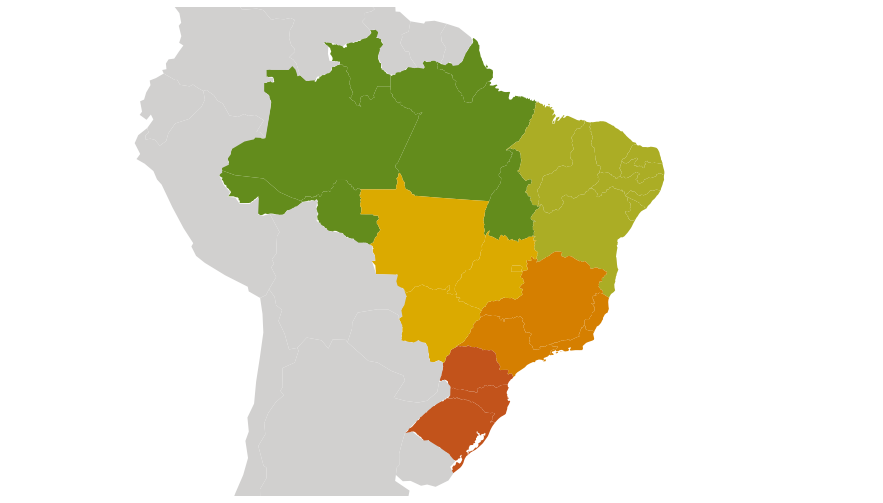

In [111]:
plot(
    brazil_regions_df,
    brazil_regions_geometries,
    brazil_bounds_series,
    background_geometry)

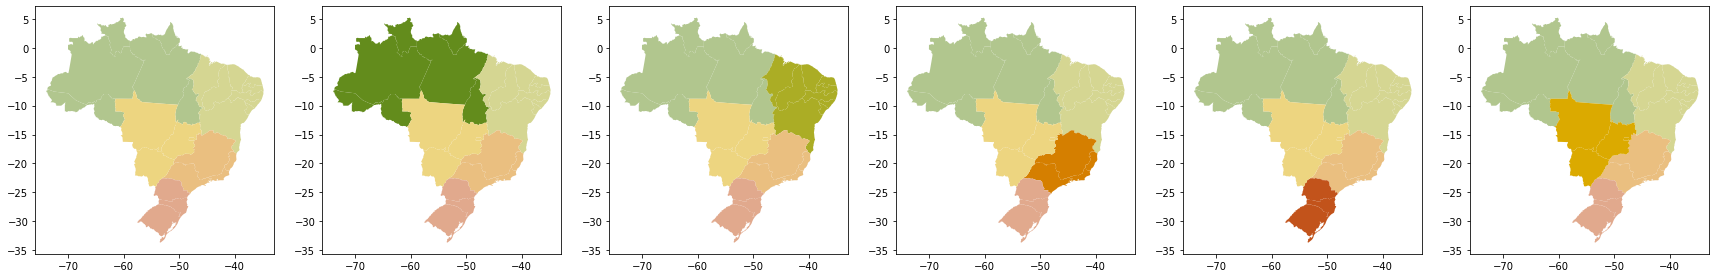

In [112]:
fig, ax = plt.subplots(ncols=6, figsize=(30, 5))
subplot_figsize = (5, 5)
gray = CARGILL_COLORS['Cool Gray 7 C']
non_highlight_colors = CARGILL_COLORS_50PC_TINT

color_brazil_regions(
    brazil_regions_df,
    {key: non_highlight_colors[value] for key, value in REGIONS_COLOR_MAP.items()},
    brazil_regions_geometries,
    ax=ax[0],
    figsize=subplot_figsize)
for i in range(NUMBER_REGIONS_IN_BRAZIL):
    color_map = deepcopy(REGIONS_HEX_COLOR_MAP)
    for j in range(NUMBER_REGIONS_IN_BRAZIL):
        if i != j:
            color_map[j+1] = non_highlight_colors[REGIONS_COLOR_MAP[j+1]]

    color_brazil_regions(
        brazil_regions_df,
        color_map,
        brazil_regions_geometries,
        ax=ax[i+1],
        figsize=subplot_figsize)

In [113]:
def get_highlight_color_maps(
        standard_color_map: dict[int, str],
        highligh_colors: dict[int, str],
        non_highlight_colors: dict[int, str]):
    color_maps = [
        {key: non_highlight_colors[value] for key, value in standard_color_map.items()}
    ]
    for i in range(len(standard_color_map)):
        color_map = {}
        for j, color_name in enumerate(standard_color_map.values()):
            region_id = j+1
            if i != j:
                color_map[region_id] = non_highlight_colors[color_name]
            else:
                color_map[region_id] = highligh_colors[color_name]
        
        color_maps.append(color_map)
    
    return color_maps

In [114]:
highlight_color_maps = get_highlight_color_maps(
    REGIONS_COLOR_MAP,
    CARGILL_COLORS,
    CARGILL_COLORS_50PC_TINT)

len(highlight_color_maps)

6

In [115]:
highlight_color_maps

[{1: '#B1C68E', 2: '#D5D692', 3: '#EABF80', 4: '#E1A98D', 5: '#EDD580'},
 {1: '#638C1C', 2: '#D5D692', 3: '#EABF80', 4: '#E1A98D', 5: '#EDD580'},
 {1: '#B1C68E', 2: '#ABAD25', 3: '#EABF80', 4: '#E1A98D', 5: '#EDD580'},
 {1: '#B1C68E', 2: '#D5D692', 3: '#D57F00', 4: '#E1A98D', 5: '#EDD580'},
 {1: '#B1C68E', 2: '#D5D692', 3: '#EABF80', 4: '#C2531B', 5: '#EDD580'},
 {1: '#B1C68E', 2: '#D5D692', 3: '#EABF80', 4: '#E1A98D', 5: '#DBAA00'}]

## Exporting

In [116]:
background_geometry = south_america.geometry

In [125]:
EXPORT_FORMAT = 'svg'

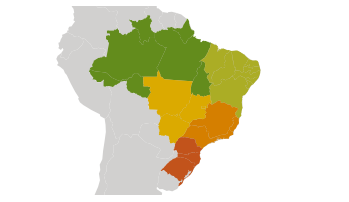

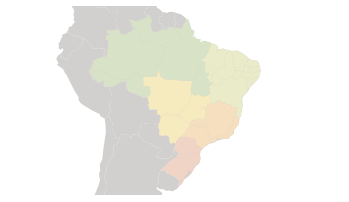

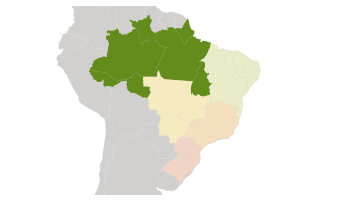

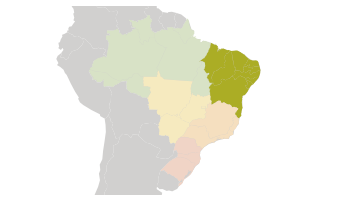

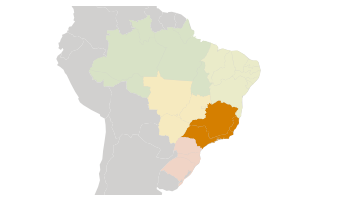

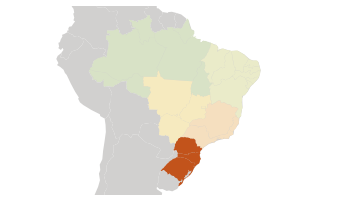

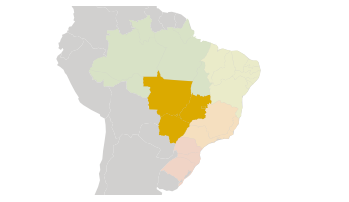

In [126]:
highlight_color_maps = get_highlight_color_maps(
    REGIONS_COLOR_MAP,
    CARGILL_COLORS,
    CARGILL_COLORS_75PC_TINT)

highlight_color_maps.insert(0, REGIONS_HEX_COLOR_MAP)

for i, color_map in enumerate(highlight_color_maps):
    fig, ax = plt.subplots()
    plot(
        brazil_regions_df,
        brazil_regions_geometries,
        brazil_bounds_series,
        background_geometry,
        color_map=color_map,
        ax=ax,
        zorder=2)
    fig.savefig(
        f'results/{EXPORT_FORMAT}/regions/{i}.{EXPORT_FORMAT}',
        bbox_inches='tight',
        pad_inches=0.0)